In [116]:
from sklearn.neighbors import BallTree
from skbio import OrdinationResults
import pandas as pd
import numpy as np
import qgrid
from knn import KNN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

In [117]:
qgrid.enable(dataframe=True, series=True)
qgrid.set_grid_option('maxVisibleRows', 10)
qgrid.set_grid_option('forceFitColumns', False)
qgrid.set_grid_option('defaultColumnWidth', 120)

In [118]:
metadata = pd.read_table('data/ag_map_with_alpha.txt', 
                         index_col=0,dtype=str,
                         na_values=['Unspecified', 'NaN'])
metadata = metadata.iloc[:, 42:]

In [128]:
def age_filter(x):
    col = 'age_corrected'
    return (float(x[col]) > 20 and float(x[col]) < 69) or pd.isnull(x[col])

def autoimmune_filter(x):
    col = 'autoimmune'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def antibiotics_filter(x):
    col = 'antibiotic_history'
    return x[col] != 'Year' or pd.isnull(x[col])

def asd_filter(x):
    col = 'asd'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def bmi_filter(x):
    col = 'bmi_corrected'
    return (float(x[col]) > 18.5 and float(x[col]) < 30) or pd.isnull(x[col])

def cancer_filter(x):
    col = 'cancer'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def cardiovascular_filter(x):
    col = 'cardiovascular_disease'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def cdiff_filter(x):
    col = 'cdiff'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def diabetes_filter(x):
    col = 'diabetes'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def bipolar_filter(x):
    col = 'depression_bipolar_schizophrenia'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def ibd_filter(x):
    col = 'ibd'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def ibs_filter(x):
    col = 'ibs'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def kidney_filter(x):
    col = 'kidney_disease'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def thyroid_filter(x):
    col = 'thyroid'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def lung_disease_filter(x):
    col = 'lung_disease'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def sibo_filter(x):
    col = 'sibo'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def fungal_filter(x):
    col = 'fungal_overgrowth'
    return x[col] == 'I do not have this condition' or pd.isnull(x[col])

def mental_filter(x):
    col = 'mental_illness'
    return x['mental_illness'] == 'No' or pd.isnull(x[col])

In [110]:
np.isnan(metadata.loc['10317.000031505', 'ibd'])

True

In [130]:
filters = ['age', 'autoimmune', 'antibiotics', 'asd', 'bmi',
           'cancer', 'cardiovascular', 'cdiff', 'diabetes', 
           'kidney', 'thyroid', 'lung_disease', 'sibo',
           'fungal', 'bipolar', 'ibd', 'ibs', 'mental'] 

healthy = np.array([True] * metadata.shape[0])
for f in filters:
    func = eval(f + "_filter")
    healthy = np.logical_and(healthy, metadata.apply(func, axis=1))
metadata['healthy'] = healthy

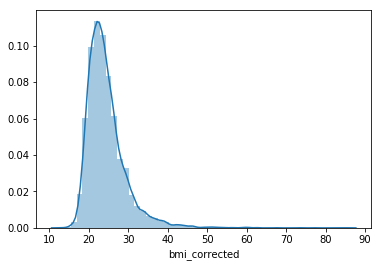

In [121]:
import seaborn as sns
%matplotlib inline
sns.distplot(metadata.bmi_corrected.dropna().astype(np.float))

In [122]:
metadata.apply(cancer_filter, axis=1).sum()

9264

In [131]:
metadata.to_csv('healthy_metadata.txt', sep='\t')

In [127]:
metadata.healthy.sum()

3799

In [115]:
metadata.sibo.value_counts()

A Jupyter Widget